Clssification is a form of machine learning in which you train a model to predict which category an item belongs to.

Binary classification is a classification with two categories.

Classification is an example of a supervised machine learning technique,it relies on data that includes known feature values as well as known label values.

A classification algorithm is used to fit a suset of data to a function that can calculate the probalility for each class label from the feature values.
The remaining data is used to evaluate the model by comparing the predictions it generates from the features to the features to the class labels.

One function to use is a logistic function, which forms a sigmoidal(S-shaped) curve.

## Train and evaluate a classification model

### Binary Classification

#### Exlpore the data

In [2]:
import pandas as pd

# Loading the dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
# Separate the features from labels

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = ['Diabetic']

X,y = diabetes[features].values,diabetes[label].values


for n in range(0,4):
    print("Patients",str(n+1),"\n Features:",list(X[n]),"\n Label:",y[n])

Patients 1 
 Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 Label: [0]
Patients 2 
 Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 Label: [0]
Patients 3 
 Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 Label: [0]
Patients 4 
 Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 Label: [1]


In [4]:
diabetes.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


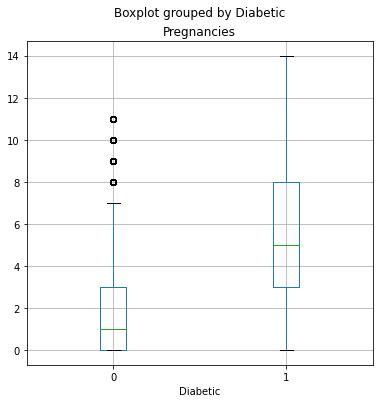

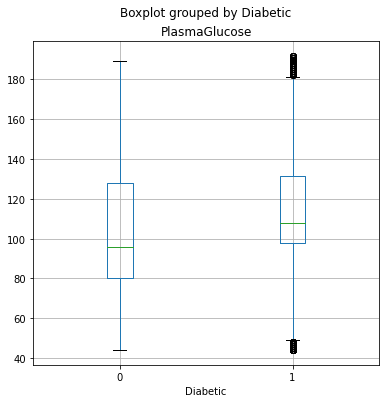

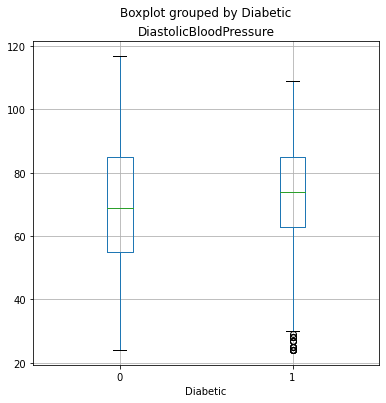

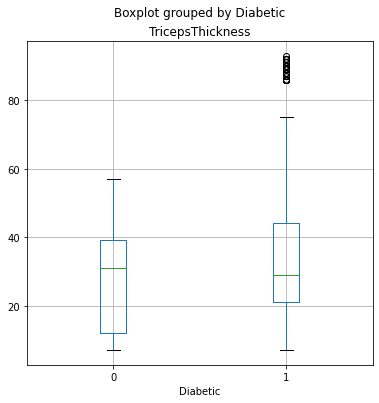

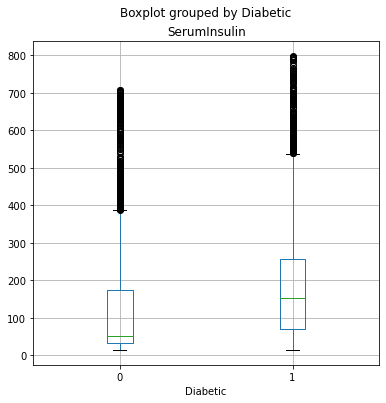

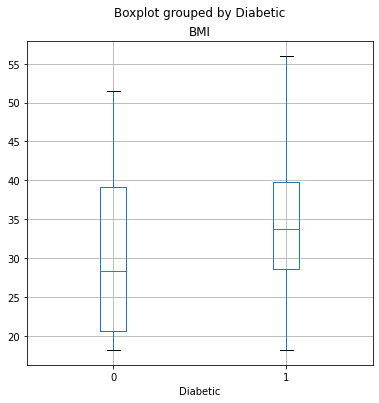

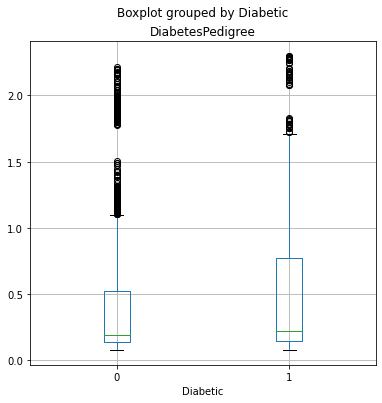

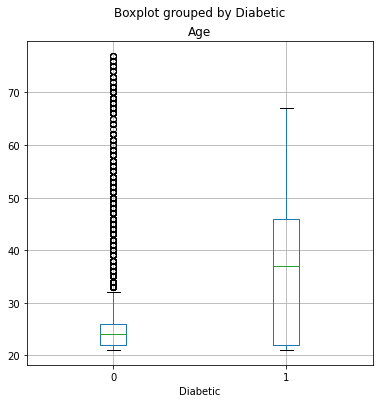

In [6]:
# Lets compare the feature distribution for each label value

from matplotlib import pyplot as plt

features = features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col,by = 'Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

Pregnancies and Age show markedly differentt distributions for diabetic patients than for non-diabetic patients.These feature may hep predict whether or not a patient is diabetic

### Split the data

Scikit-Learn has train_test_split functiin that ensures we get a **statistically random split**
of training and test data. 

We will use that to split the data into 70% for training and hold back 30% for testing.

In [7]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print('Training cases: %d\nTest cases: %d' %(X_train.shape[0],X_test.shape[0]))

Training cases: 10500
Test cases: 4500


### Train and Evaluate a Binary Classification Model

We'll need to set a **regularization parameter**.This is used to counter any bias in the sample, and help the model generalize well by avoiding overfitting the model to the training data.

In [8]:
# Train the model 
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# Train the logistic regression model on the training set
model = LogisticRegression(C=1/reg,solver="liblinear").fit(X_train,y_train)
print(model)

C:\Users\User-Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100.0, solver='liblinear')


In [9]:
# We'll can test the training set using the data w held back to evaluate how well it predicts.

predictions = model.predict(X_test)
print('Predicted labels: ',predictions)
print('Actual labels:',y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels: [[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [10]:
# scikit-learn provides some metrics that we can use to evaluate the model
# We may need to check the accuracy of the predictions(what proportion of the labels did the model predict correctly?)

from sklearn.metrics import accuracy_score

print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.7891111111111111


The accuracy is returned as a decimal value- a value of 1.0 would mean that the model got 100% of the predictions right

We'll look at alternatives to accuracy that can be much more useful in machine learning

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics for each class(0 and 1)

- **Precision**.Of all the predictions the model made for this class,what proportion were correct?
- **Recall**. Out of all of the instances of this class in the test dataset,how many did the model identify?
- **F-1 Score**. An average metric that takes both precision and recall into account.
- **Support**. How many instances of this class are there in the test dataset?

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

Because this is a binary classification problem, the 1 class is considered positive and its precision and recall are particularly interesting-the in effect answer the questions:
   - Of all the patients the model predicted are diabetic, how many are actually diabetic?
   - Of all the patients that are actuall diabetic, how many did the model identify?


    
You can retrieve these values on thier own by using the **precision_score** and **recall_score** metrics in the scikit-learn(which by default assumes a binary classification model)


In [12]:
from sklearn.metrics import precision_score,recall_score

print("Overall Precision:",precision_score(y_test,predictions))
print("Overall Recall:",recall_score(y_test,predictions))

Overall Precision: 0.7240285487708168
Overall Recall: 0.6030383091149274


The precision and recall metrics are derived from four possible prediction outcome:
   - True positives
   - False Positives.Thepredicted label is 1,but the actual label is 0.
   - False Negatives 
   - True Negatives 
    
These metrics are generally tabulated for the test data nd shown together as a **confusion matrix**. The TN and TP should be ignificantly higher than the *false* predictions if the model is any good.

We cam use the **sklearn.metrics.confusion_matrix** function to find these values for  trained classifier:

In [13]:
from sklearn.metrics import confusion_matrix

# print the confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[2638  348]
 [ 601  913]]


A threshhold of 0.5 is used to decide whether the predicted label is a 1  or 0

You can use the **predict_proba** method to see the probability pairs for each case:

In [14]:
y_score = model.predict_proba(X_test)
print(y_score)

[[0.81655964 0.18344036]
 [0.96289025 0.03710975]
 [0.80840197 0.19159803]
 ...
 [0.60686452 0.39313548]
 [0.10722398 0.89277602]
 [0.6392454  0.3607546 ]]


A common way to evaluate a classifier is to examine the *true positive rate*(which is another name for **recall**) and the *false positive rate* for a range of possible thresholds.

These rates are the plotted against al possible thresholds to form a chart known as a **received operator characteristic(ROC)**chart

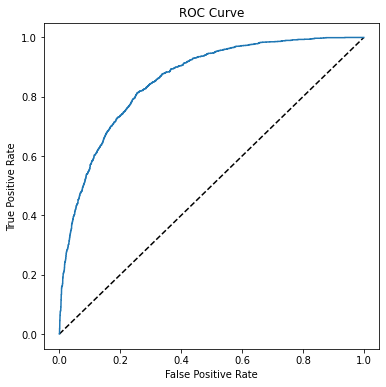

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate ROC curve
fpr,tpr,thresholds = roc_curve(y_test,y_score[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6,6))
# Plot the diagnal line
plt.plot([0,1],[0,1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

A perfect classifier would have a curve that goes straight up the left and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction;so you obviously want the curve to be higher that that(or your model is no better than simply guessing)

The area under the curve(AUC) is the value between 0 and 1 that quantifies the overall perfomance of the model. The closer o 1 this value is, the better the model.

Scikit-learn includes a function to calculate this metric.

In [16]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_score[:,1])
print('AUC:'+ str(auc))

AUC:0.8568568776704321


### Perform preprocessing in a pipeline

In practise, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it.

There's a huge range of preprocessing transormations you can perform to get your data ready for modelling. We'll limit ourself to a few common techniques:
- Scaling numeric features
- Encoding categorical variables.

In [17]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import LogisticRegressin
import numpy as np

# Define preprocessing for numeric columns(normalize so that they are on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())])
# Define preprocessing for categorical features(encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown="ignore"))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
     ('num',numeric_transformer,numeric_features),
     ('cat',categorical_transformer,categorical_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                          ('logregressor',LogisticRegression(C=1/reg,solver="liblinear"))])
# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train,(y_train))
print(model)

C:\Users\User-Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.
Let's use the model trained by this pipeline to predict labels for our test set, and compare the perfomance metrics with the basic model we created


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202440539337693


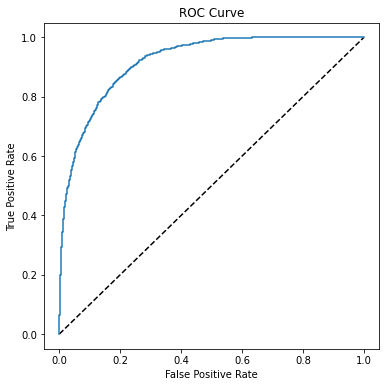

In [18]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Try a different algorithm
We've used a logistic regression algorithm, which is a linear algirithm.
There are many kinds of classification algorithm, we could try including:
- **Support Vector Machine algorithms**: Algorithms that define a hyperplane that separates classes.
- **Tree-based algorithm**: Algorithm that builds tree to reach a prediction.
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

In [19]:
# We will use ensemble algorithm named Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                          ('logregressor',RandomForestClassifier(n_estimators=100))])

# Fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train,(y_train))
print(model)

C:\Users\User-Pc\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2858  128]
 [ 182 1332]] 

Accuracy: 0.9311111111111111
Overall Precision: 0.9123287671232877
Overall Recall: 0.8797886393659181

AUC: 0.9817177431271075


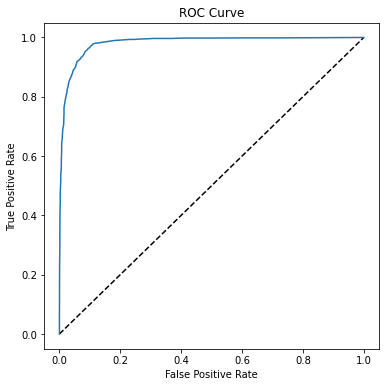

In [20]:
# The perfomance of the new model
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Use the Model for Inferencing


In [21]:
import joblib

# save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model,filename)

['./diabetes_model.pkl']

In [22]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


### Create a multiclass classification models

Its where you predict more than two binary classes.

Multiple class can be thought as a combination of multiple biary classifiers.There are two waysin which you can approach the problem:
 - **One vs Rest** ,  in which the classifier is created for each possible class value, with a positive outcome for the cases where where the prediction is this class, and negative predictions for the cases where the prediction is any other class.
 - **One vs One**, in which a classifier for each possible class is created.



### Train and evaluate multiclass classification models

#### Explore the data

In [24]:
# # load the dataset 
penguins = pd.read_csv('penguins.csv')

# Display a random sample of 10 observitions

sample = penguins.sample(10)
sample


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
156,47.6,14.5,215.0,5400.0,1
309,51.0,18.8,203.0,4100.0,2
109,43.2,19.0,197.0,4775.0,0
328,45.7,17.3,193.0,3600.0,2
332,45.2,16.6,191.0,3250.0,2
54,34.5,18.1,187.0,2900.0,0
231,45.2,16.4,223.0,5950.0,1
81,42.9,17.6,196.0,4700.0,0
114,39.6,20.7,191.0,3900.0,0
163,49.0,16.1,216.0,5550.0,1


The species is the label that we want to predict. The dataset include three possible species, which are encoded as 0,1 and 2. The acrual species names are revealed by the code below:

In [25]:
penguin_classes = ['Adelie','Gentoo','Chinstrap']
print(sample.columns[0:5],'SpeciesName')
for index,row in penguins.sample(10).iterrows():
    print('[',row[0],row[1],row[2],row[3],int(row[4]),']',penguin_classes[int(row[4])])

Index(['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass', 'Species'], dtype='object') SpeciesName
[ 52.0 19.0 197.0 4150.0 2 ] Chinstrap
[ 50.0 15.3 220.0 5550.0 1 ] Gentoo
[ 50.8 19.0 210.0 4100.0 2 ] Chinstrap
[ 48.1 16.4 199.0 3325.0 2 ] Chinstrap
[ 46.4 15.6 221.0 5000.0 1 ] Gentoo
[ 42.0 19.5 200.0 4050.0 0 ] Adelie
[ 33.5 19.0 190.0 3600.0 0 ] Adelie
[ 37.2 18.1 178.0 3900.0 0 ] Adelie
[ 37.3 16.8 192.0 3000.0 0 ] Adelie
[ 39.6 17.7 186.0 3500.0 0 ] Adelie


In [27]:
# Count the number of missing values
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [28]:
# Show the rows containing missing values
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [29]:
# Drop the rows containing missing values
penguins = penguins.dropna()

# Confirm there are now no nulls
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

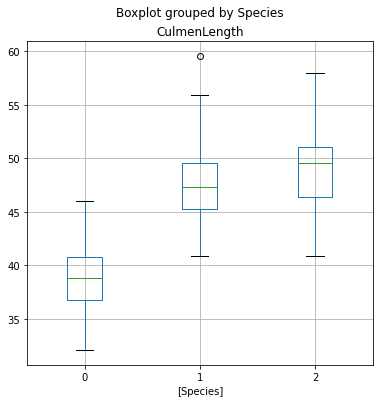

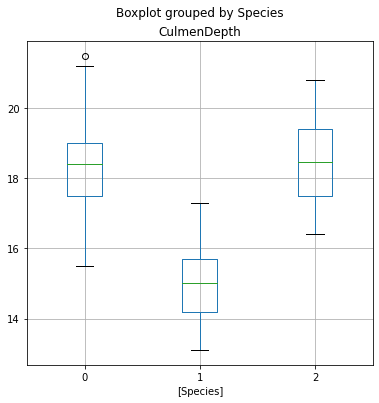

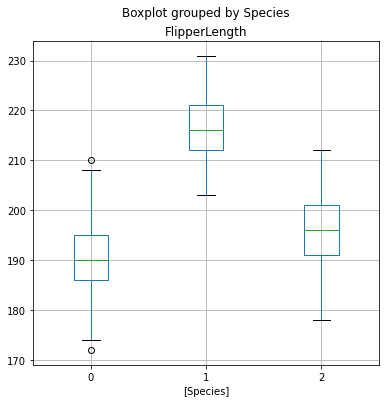

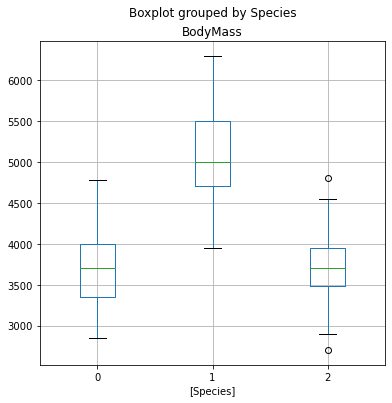

In [31]:
# Lets explore how the features relate to the labe; by creating some box charts
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = ['Species']
for col in penguin_features:
    penguins.boxplot(column = col,by = penguin_label,figsize =(6,6))
    plt.title(col)
plt.show()


# Fromthe box plots, it looks like species  and 2(Adelie and Chinstrap) have similar data profiles for culmen depth,fipper length,and body mass,but Chinstraps tend to have longer culmens. Species 1(Gentoo) tend to have fairly clearly differentiated features from the other; which should help us train a classification model.


#### Prepare the data
We separate the features and labels, and then split the data into subsets for training and validation.
We'll also apply a **stratification technique** when splitting the data to maintain the proportion of each label value in the training and validation datasets.

In [35]:
from sklearn.model_selection import train_test_split

# Separate features and labels
penguins_X,penguins_y = penguins[penguin_features].values,penguins[penguin_label].values

# Split data 70%-30% into training set and test set 

x_penguin_train,x_penguin_test,y_penguin_train,y_penguin_test = train_test_split(penguins_X,penguins_y,
                                                                                test_size = 0.30,stratify=penguins_y,random_state = 0)
print('Training Set:%d,Test Set:%d \n'%(x_penguin_train.shape[0],x_penguin_test.shape[0]))                                                                               
                                                                                


Training Set:239,Test Set:103 



##### Train and evaluate a multiclass classifier
We'll try a logistic regression algorithm

In [36]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression on the training set
multi_model = LogisticRegression(C=1/reg,solver = 'lbfgs',multi_class='auto',max_iter=1000).fit(x_penguin_train,y_penguin_train)
print(multi_model)

C:\Users\User-Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.0, max_iter=1000)


In [40]:
# Lets look at the classification report
from sklearn.metrics import classification_report
print(classification_report(y_penguin_test,penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



As with binary classification,the report includes precision and recall metrics for each class, while in binary classification we would focus on the scores for the positive class; in this case, there are multiple classes so we need to look at an overall metric(either the macro or weghted average) to get a sense of how well the model performs across all three classes.

You cam get the overall metric separately from the report using the **scikit-learn metrics score classes**, but with multiclass results you must specify which avarage metric you use for precision and recall.

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('Overall Accuracy:',accuracy_score(y_penguin_test,penguin_predictions))
print('Overall Precision:',precision_score(y_penguin_test,penguin_predictions,average='macro'))
print('Overall Recall:',recall_score(y_penguin_test,penguin_predictions,average='micro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.970873786407767


In [48]:
# Lets look at the confusion matrix for our model
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test,penguin_predictions)
print(mcm)

# The diagnal intersections from top-left to bottom-right indicate the number of correct predictions.

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


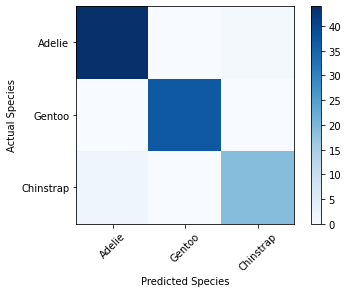

In [49]:
# When dealing with multiple classes,it's generally more intuative to visualize this as a heat map

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks,penguin_classes,rotation = 45)
plt.yticks(tick_marks,penguin_classes)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

In the case for a multiclass classification model, a single ROC curve showing true positives rate vs false positive rate is not possible. However,you can use the rates for each class in a One vs Rest(OVR) comparison to create a ROC chart for each class.

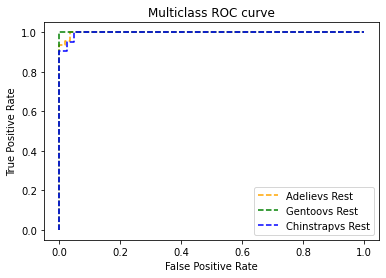

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh = {}
for i in range(len(penguin_classes)):
    fpr[i],tpr[i],thresh[i] = roc_curve(y_penguin_test,penguin_prob[:,i],pos_label=i)
# Plot the ROC chart
plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label=penguin_classes[0]+'vs Rest')
plt.plot(fpr[1],tpr[1],linestyle='--',color = 'green',label=penguin_classes[1]+'vs Rest')
plt.plot(fpr[2],tpr[2],linestyle='--',color = 'blue',label=penguin_classes[2]+'vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()
           

To quantify the ROC perfomance, you can calculate an aggregate area under the curve score that is averaged across all the OVR curves.

In [55]:
auc = roc_auc_score(y_penguin_test,penguin_prob,multi_class='ovr')
print('Average AUC:',auc)

Average AUC: 0.9981999902100828


### Preprocess data in a pipeline
Let's see if we can improve the penguin predictor by sclaing the numeric features in a transformation step before training.

We will also try a different algorithm(**a support vector machine**)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric features 
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[('scaler',StandardScaler())])

# Create preprocessing steps
preprocessor = ColumnTransformer(transformers=[('preprocess',feature_transformer,feature_columns)])

# Create a training pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                          ('regressor',SVC(probability=True))])
# Fit the pipeline to train the model on the training set
multi_model = pipeline.fit(x_penguin_train,y_penguin_train)
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


C:\Users\User-Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


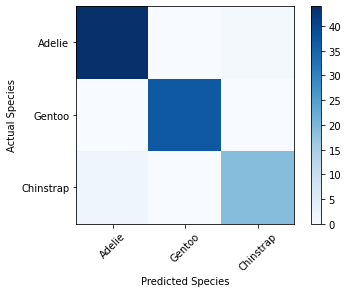

In [58]:
# We can now evaluate our model
# Get predictions from test data
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

#### Use the model with new data observations




In [59]:
# we will fisrt save the model as a pickle file
filename = './pemguin_model.pkl'
joblib.dump(multi_model,filename)

['./pemguin_model.pkl']

In [60]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[50.4,15.3,224,5550]])
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])

New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


In [61]:
# This time our input is an array of two feature arrays
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)
